In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/IS"

/content/drive/My Drive/Colab Notebooks/IS


In [ ]:
df_node = pd.read_csv('node.csv')
df_edge = pd.read_csv('edge.csv')

In [ ]:
df_node

,new_id,screen_name,List,name,description,url,followers_count,friends_count,created_at,location,id
0,0,_evefee_,initial,อีฟฟี่ 92🔝,ชอบคสอ.💄ชอบของกิน🍩ชอบแมว🐱 ig @_evefee_ // ติดต...,https://t.co/NplvqoAJ6p,59468,242,Thu Apr 21 12:53:42 +0000 2016,Bkk,7.230000e+17
1,1,Architastation,initial,อาชิตา,0,https://t.co/HZxElMk5E5,93355,124,Wed Nov 11 14:26:59 +0000 2009,Thailand,8.919560e+07
2,2,bew_varaporn,initial,Bew Varaporn,Hello :),https://t.co/39nwCzvm1g,3835,55,Tue Aug 14 07:52:44 +0000 2018,Thailand,1.030000e+18
3,3,BlacklistSecret,initial,BLACKLIST.SECRET,📷 ig: Blacklist.secret / Your support Sister 🖤...,https://t.co/RSijQecD7j,147502,1218,Tue Jun 13 06:45:36 +0000 2017,Thailand,8.750000e+17
4,4,brinkkty,initial,Brinkkty,To improve is to change :),0,115173,82,Sun Aug 06 16:41:25 +0000 2017,0,8.940000e+17
...,...,...,...,...,...,...,...,...,...,...,...
116,116,natitreview,Interation4,เนิร์ส ณฐิต🌷,1997•NC23 undertone ขาวเหลือง ||ผิวผสม||🦄 💎Con...,https://t.co/C3fRuuAiu0,17258,525,Sun Oct 07 08:25:51 +0000 2018,0,1.050000e+18
117,117,Nananblogblog,Interation4,นาแนนป้ายยา ❤︎,🧖🏼‍♀️ สภาพผิวมันเป็นสิวง่าย NC25 | 🍑 ❥1...,https://t.co/YTcQP1toYs,45899,716,Sun Jan 24 07:58:22 +0000 2010,Contact Work 👉🏻 DM,1.079436e+08
118,118,withpeachy,Interation4,🕊,she/her • creator & reader • for work: st.sync...,https://t.co/u6P4DeQ6gr,29653,162,Mon Nov 20 15:19:06 +0000 2017,0,9.330000e+17
119,119,ladypichaam,Interation4,✿ ┈ เลดี้พิชาม ┈ ✿,เลดี้พิชาม 26 ขวบ |FB Page เลดี้พิชาม| IG lady...,https://t.co/ulxjbEF1Zo,14945,543,Mon Jul 06 01:53:54 +0000 2015,0,3.269544e+09


In [ ]:
df_edge

,user,following
0,0,102
1,0,17
2,0,51
3,0,47
4,0,30
...,...,...
9205,120,57
9206,120,56
9207,120,26
9208,120,30


## Create graph

In [ ]:
# Generate Networkx Graph from data frame
G = nx.from_pandas_edgelist(df_edge, "user", "following", create_using=nx.DiGraph())
G.number_of_edges()

9210

In [ ]:
#set attribute

nx.set_node_attributes(G, pd.Series(df_node.screen_name, index=df_node.new_id).to_dict(), 'screen_name')
nx.set_node_attributes(G, pd.Series(df_node.followers_count , index=df_node.new_id).to_dict(), 'followers_count')
nx.set_node_attributes(G, pd.Series(df_node.friends_count , index=df_node.new_id).to_dict(), 'friends_count')
nx.set_node_attributes(G, pd.Series(df_node.created_at , index=df_node.new_id).to_dict(), 'created_at')


In [ ]:
# display node attribute
G.nodes(data=True)

NodeDataView({0: {'screen_name': '_evefee_', 'followers_count': 59468, 'friends_count': 242, 'created_at': 'Thu Apr 21 12:53:42 +0000 2016'}, 102: {'screen_name': 'quenxHN', 'followers_count': 32468, 'friends_count': 510, 'created_at': 'Mon Dec 12 18:56:18 +0000 2016'}, 17: {'screen_name': 'SoundtissST', 'followers_count': 55994, 'friends_count': 56, 'created_at': 'Wed Jul 14 05:58:01 +0000 2021'}, 51: {'screen_name': 'imbeamie', 'followers_count': 93913, 'friends_count': 223, 'created_at': 'Fri Aug 05 07:59:04 +0000 2016'}, 47: {'screen_name': 'adearabitty', 'followers_count': 42017, 'friends_count': 639, 'created_at': 'Wed Mar 01 19:09:00 +0000 2017'}, 30: {'screen_name': 'licktga', 'followers_count': 33969, 'friends_count': 147, 'created_at': 'Sat Mar 31 04:53:44 +0000 2012'}, 27: {'screen_name': 'littlefahsai', 'followers_count': 105606, 'friends_count': 192, 'created_at': 'Wed Sep 25 18:37:49 +0000 2013'}, 67: {'screen_name': 'Janniesday_', 'followers_count': 73571, 'friends_count

In [ ]:
# edge view
G.edges()

OutEdgeView([(0, 102), (0, 17), (0, 51), (0, 47), (0, 30), (0, 27), (0, 67), (0, 89), (0, 80), (0, 40), (0, 109), (0, 19), (0, 50), (0, 41), (0, 23), (0, 96), (0, 106), (0, 8), (0, 12), (0, 33), (0, 42), (0, 16), (0, 56), (0, 18), (0, 35), (0, 43), (0, 4), (0, 44), (0, 24), (0, 36), (0, 45), (0, 3), (0, 28), (0, 21), (0, 11), (0, 37), (0, 31), (0, 29), (0, 34), (0, 25), (0, 32), (0, 1), (0, 9), (0, 7), (0, 14), (0, 10), (0, 38), (0, 26), (0, 5), (0, 22), (0, 6), (102, 17), (102, 16), (102, 4), (102, 23), (102, 95), (102, 77), (102, 88), (102, 34), (102, 59), (102, 81), (102, 20), (102, 109), (102, 21), (102, 14), (102, 110), (102, 119), (102, 80), (102, 36), (102, 111), (102, 6), (102, 104), (102, 115), (102, 114), (102, 28), (102, 112), (102, 93), (102, 107), (102, 117), (102, 86), (102, 97), (102, 33), (102, 61), (102, 70), (102, 91), (102, 90), (102, 116), (102, 40), (102, 0), (102, 30), (102, 11), (102, 100), (102, 22), (102, 103), (102, 71), (102, 94), (102, 7), (102, 41), (102, 7

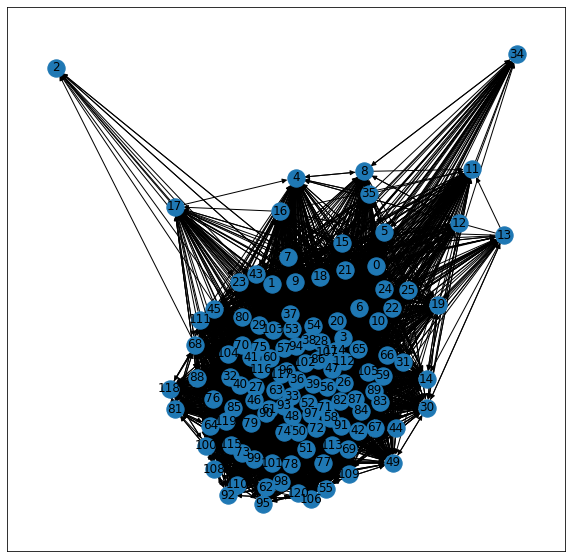

In [ ]:
# plot graph
plt.figure(figsize=(10,10))

# draws the graph to pyplot axes
#pos = nx.random_layout(G, seed=23)
#nx.draw(G, with_labels=True,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)
nx.draw_networkx(G)
plt.show()

In [ ]:
adj_G = nx.to_numpy_matrix(G, nodelist = df_node['new_id'])
adj_G.shape
adj_G

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

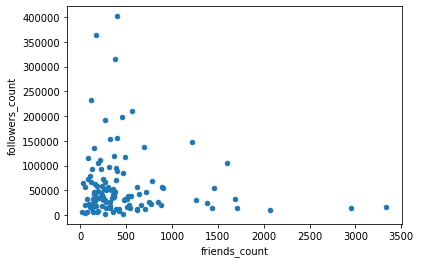

In [ ]:
df_node.plot(kind = 'scatter', x = 'friends_count', y = 'followers_count')

plt.show()

## Centrality Measure

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [ ]:
# Degree centrality
deg_centrality = nx.degree_centrality(G)
in_deg_centrality = nx.in_degree_centrality(G)
out_deg_centrality = nx.out_degree_centrality(G)
#draw(G, pos, in_deg_centrality, 'In Degree Centrality')

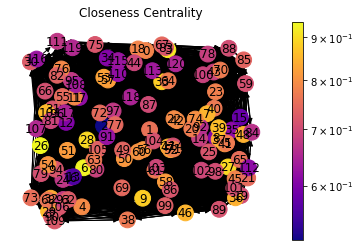

In [ ]:
# Closeness centrality
close_centrality = nx.closeness_centrality(G)
#draw(G, pos, close_centrality, 'Closeness Centrality')

In [ ]:
# Betweenness centrality
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
bet_centrality

{0: 0.0037116926065760346,
 1: 0.0028237537393155476,
 2: 2.488740594276926e-06,
 3: 0.015261935429350086,
 4: 0.0008180333432448819,
 5: 0.0018693648948128986,
 6: 0.007121514489787327,
 7: 0.007602961389665809,
 8: 0.0009102709944789946,
 9: 0.010129461019240666,
 10: 0.00863486615035761,
 11: 0.00041870073269450277,
 12: 0.00018443987076077972,
 13: 7.802318896506055e-05,
 14: 0.0026244871908123074,
 15: 0.0003799094349477937,
 16: 0.0006233650486762472,
 17: 0.0001088626230142495,
 18: 0.003858755589437278,
 19: 0.0012906833701119907,
 20: 0.009065367322338843,
 21: 0.0027251808423524653,
 22: 0.004245266101323757,
 23: 0.00523317317423902,
 24: 0.0015559330792103835,
 25: 0.001965497168350394,
 26: 0.013202750637976655,
 27: 0.00850890739623171,
 28: 0.010592174934807023,
 29: 0.005166717117240515,
 30: 0.0022553451390120998,
 31: 0.003905379191281658,
 32: 0.004274422004233182,
 33: 0.007640216847491707,
 34: 8.796003871271477e-05,
 35: 0.0003114103830382255,
 36: 0.0060764483227

In [ ]:
# Eigenvector centrality
eigenvec_centrality_numpy = nx.eigenvector_centrality_numpy(G)
eigenvec_centrality = nx.eigenvector_centrality(G)
eigenvec_centrality

{0: 0.10032078053879077,
 1: 0.09627975563724586,
 2: 0.01172995968060069,
 3: 0.12477696370113127,
 4: 0.10192298305968626,
 5: 0.09750453326977998,
 6: 0.12562064828481215,
 7: 0.11284698064512243,
 8: 0.047447595870428086,
 9: 0.11779070617428461,
 10: 0.11465032297685412,
 11: 0.1009220032463624,
 12: 0.047253594796902956,
 13: 0.031349328680395444,
 14: 0.079172405419389,
 15: 0.03971087053620542,
 16: 0.061211607830597474,
 17: 0.05462492910149721,
 18: 0.10139919377080933,
 19: 0.08257670263085572,
 20: 0.10111333058191116,
 21: 0.09257062955258867,
 22: 0.10315597588634698,
 23: 0.09842914029071417,
 24: 0.0731625850193953,
 25: 0.08575670149868783,
 26: 0.12795173947175786,
 27: 0.12180253337536995,
 28: 0.12161413369614317,
 29: 0.11494902914405414,
 30: 0.08866684152669392,
 31: 0.08699137687808622,
 32: 0.11178208650591383,
 33: 0.12027463260233084,
 34: 0.05003881209365716,
 35: 0.05507653802109461,
 36: 0.11336730003898379,
 37: 0.11141436406948432,
 38: 0.097363635672215

In [ ]:
# PageRank
pagerank = nx.pagerank(G, alpha = 0.85)
pagerank

{0: 0.011872606450432697,
 1: 0.010588848563616981,
 2: 0.002208302911914546,
 3: 0.013834423559587776,
 4: 0.010669692806933133,
 5: 0.011918995650226007,
 6: 0.013971541100870172,
 7: 0.013517939851140897,
 8: 0.007589161167429489,
 9: 0.014060335199667354,
 10: 0.013688955159142183,
 11: 0.010608617373908318,
 12: 0.005120215876473818,
 13: 0.003660113440930027,
 14: 0.008149854157786131,
 15: 0.004533617356667937,
 16: 0.00702624189489948,
 17: 0.005776391956276579,
 18: 0.01130968787183094,
 19: 0.009358879302389477,
 20: 0.010636912513809441,
 21: 0.01074227256965735,
 22: 0.011949057911943459,
 23: 0.011371590010522379,
 24: 0.008637141545115867,
 25: 0.009950461630648595,
 26: 0.013236927820398538,
 27: 0.012308634537539154,
 28: 0.011779821522166821,
 29: 0.011382658828132096,
 30: 0.009410706651981005,
 31: 0.008769678019732895,
 32: 0.010484731307955564,
 33: 0.011304826278355206,
 34: 0.006355607591863889,
 35: 0.006592007086349164,
 36: 0.010265555981133326,
 37: 0.0103965

In [ ]:
#df_centrality = pd.DataFrame([deg_centrality,in_deg_centrality,out_deg_centrality,close_centrality,bet_centrality,eigenvec_centrality,pagerank]).traspose()
#df_centrality.columns['deg_centrality','in_deg_centrality','out_deg_centrality','close_centrality','bet_centrality','eigenvec_centrality','pagerank']
#df_centrality


df_centrality = pd.DataFrame.from_dict({
    'node': list(deg_centrality.keys()),
    'deg_centrality': list(deg_centrality.values()),
    'in_deg_centrality': list(in_deg_centrality.values()),
    'out_deg_centrality': list(out_deg_centrality.values()),
    'close_centrality': list(close_centrality.values()),
    'between_centrality': list(bet_centrality.values()),
    'eigenvec_centrality': list(eigenvec_centrality.values()),
    'pagerank': list(pagerank.values())})

df_centrality.sort_values('node')
df_centrality.to_csv('df_centrality_all.csv',index=False)

In [ ]:
df_cen_cor = df_centrality.drop(columns=['node','deg_centrality'])
cen_cor = df_cen_cor.corr()

In [ ]:
cen_cor.to_csv('df_cen_cor_all.csv')

In [ ]:
df_deg_centrality = pd.DataFrame.from_dict({
    'node': list(deg_centrality.keys()),
    'deg_centrality': list(deg_centrality.values())
})

df_deg_centrality.sort_values('deg_centrality',ascending=False)
df_deg_centrality.to_csv('df_deg_centrality.csv',index=False)

In [ ]:
df_in_deg_centrality = pd.DataFrame.from_dict({
    'node': list(in_deg_centrality.keys()),
    'in_deg_centrality': list(in_deg_centrality.values())
})

df_in_deg_centrality.sort_values('in_deg_centrality',ascending=False)
df_in_deg_centrality.to_csv('df_in_deg_centrality.csv',index=False)

In [ ]:
df_out_deg_centrality = pd.DataFrame.from_dict({
    'node': list(out_deg_centrality.keys()),
    'out_deg_centrality': list(out_deg_centrality.values())
})

df_out_deg_centrality.sort_values('out_deg_centrality',ascending=False)
df_out_deg_centrality.to_csv('df_out_deg_centrality.csv',index=False)

In [ ]:
df_close_centrality = pd.DataFrame.from_dict({
    'node': list(close_centrality.keys()),
    'close_centrality': list(close_centrality.values())
})

df_close_centrality.sort_values('close_centrality',ascending=False)
df_close_centrality.to_csv('df_close_centrality.csv',index=False)

In [ ]:
df_between_centrality = pd.DataFrame.from_dict({
    'node': list(bet_centrality.keys()),
    'between_centrality': list(bet_centrality.values())
})

df_between_centrality.sort_values('between_centrality',ascending=False)
df_between_centrality.to_csv('df_between_centrality.csv',index=False)

In [ ]:
df_eigenvec_centrality = pd.DataFrame.from_dict({
    'node': list(eigenvec_centrality.keys()),
    'eigenvec_centrality': list(eigenvec_centrality.values())
})

df_eigenvec_centrality.sort_values('eigenvec_centrality',ascending=False)
df_eigenvec_centrality.to_csv('df_eigenvec_centrality.csv',index=False)

In [ ]:
df_pagerank = pd.DataFrame.from_dict({
    'node': list(pagerank.keys()),
    'pagerank': list(pagerank.values())
})

df_pagerank.sort_values('pagerank',ascending=False)
df_pagerank.to_csv('df_pagerank.csv',index=False)

# Link Prediction

In [ ]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes :", n)
print("Number of edges :", m)
#print("Number of connected components :", nx.strongly_connected_components(G))

Number of nodes : 121
Number of edges : 9210
Number of connected components : <built-in method close of generator object at 0x7f4bda332a50>


In [ ]:
import random
# Take a random sample of edges
edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))

print(edge_subset)

[(26, 78), (100, 102), (86, 81), (53, 3), (76, 81), (47, 40), (69, 78), (86, 99), (79, 87), (29, 46), (119, 40), (91, 4), (54, 106), (110, 106), (113, 91), (29, 26), (59, 112), (61, 86), (68, 8), (31, 37), (112, 52), (71, 107), (35, 5), (65, 105), (3, 74), (112, 45), (45, 39), (60, 84), (85, 69), (99, 64), (103, 63), (23, 44), (41, 55), (47, 31), (36, 71), (61, 80), (33, 93), (114, 51), (36, 79), (101, 72), (80, 52), (6, 82), (59, 94), (92, 29), (82, 9), (93, 65), (64, 111), (53, 60), (10, 40), (50, 103), (97, 21), (36, 58), (39, 9), (114, 117), (50, 18), (100, 32), (57, 43), (60, 104), (117, 39), (94, 117), (26, 116), (40, 78), (116, 65), (88, 28), (103, 85), (113, 63), (120, 82), (73, 18), (31, 18), (41, 73), (3, 99), (115, 51), (32, 81), (97, 107), (53, 36), (27, 78), (33, 4), (20, 34), (84, 59), (60, 67), (28, 104), (47, 28), (100, 119), (79, 35), (55, 32), (116, 32), (120, 61), (46, 80), (33, 106), (46, 84), (32, 119), (107, 54), (87, 84), (55, 41), (94, 32), (54, 42), (50, 52), (

In [ ]:
# Remove some edges and save as G_karate_train
G_train = G.copy()
G_train.remove_edges_from(edge_subset) 
n_train = G_train.number_of_nodes()
m_train = G_train.number_of_edges()
print("Number of nodes :", n_train)
print("Number of edges :", m_train)

Number of nodes : 121
Number of edges : 6908


In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", edge_subset_size)
print("Remaining : ", (m - edge_subset_size))

Deleted :  2302
Remaining :  6908


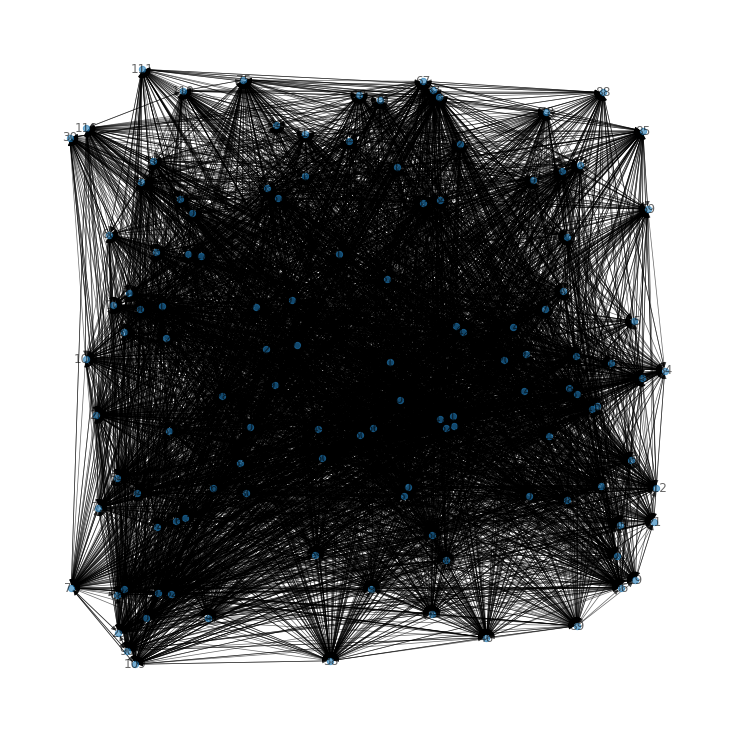

In [ ]:
# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G_train, seed=23)
nx.draw(G_train, with_labels=True,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [ ]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=56e8ffc306f07205566c980e2775f76f18f8844d6e7eeec62f92e03e3e91e4f6
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_train, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/121 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:06<00:00,  8.16it/s]


In [ ]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(df_edge['user'], df_edge['following'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), df_edge['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)